In [245]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [246]:
# Load the dataset
df = pd.read_csv("Flyzy Flight Cancellation - Sheet1.csv", sep=",")

In [247]:
df.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [248]:
df.tail()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
2995,1265781,Airline D,395,Airport 2,Airport 3,0,6,1,Type B,0.190018,1.00000,2.451216,0.283440,1
2996,5440150,Airline E,547,Airport 1,Airport 4,22,4,7,Type E,0.719271,91.00000,0.027039,0.665294,1
2997,779080,Airline C,461,Airport 1,Airport 3,8,3,1,Type B,0.458724,3.00000,1.131315,0.991307,0
2998,4044431,Airline B,464,Airport 3,Airport 3,5,5,3,Type E,0.443373,46.00000,0.968651,0.254808,1
2999,2806578,Airline A,369,Airport 1,Airport 2,1,1,10,Type A,0.704563,18.66667,1.879411,0.532486,1


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

In [250]:
df.dtypes

Flight ID                          int64
Airline                           object
Flight_Distance                    int64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type                     object
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
dtype: object

In [251]:
df.shape

(3000, 14)

In [252]:
# Checking for missing values
df.isna().sum()

Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64

### No Missing Values

In [253]:
df.describe().round(3)

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
count,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
mean,4997428.782,498.909,11.435,3.963,6.381,0.524,26.793,2.317,0.516,0.691
std,2868138.594,98.892,6.899,2.016,3.474,0.291,27.875,1.430,0.296,0.462
min,3681.000,138.000,0.000,1.000,1.000,0.001,0.000,0.000,0.001,0.000
25%,2520313.250,431.000,6.000,2.000,3.000,0.278,7.000,1.093,0.266,0.000
50%,5073095.500,497.000,12.000,4.000,6.000,0.522,18.000,2.127,0.517,1.000
75%,7462025.750,566.000,17.000,6.000,9.000,0.776,38.000,3.526,0.770,1.000
max,9999011.000,864.000,23.000,7.000,12.000,1.099,259.000,5.189,1.124,1.000


In [254]:
#Checking for Outliers
numeric_cols = df.select_dtypes(include = "number")
numeric_cols

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,475,4,6,1,0.225122,5.00000,2.151974,0.477202,0
1,4791965,538,12,1,6,0.060346,68.00000,1.600779,0.159718,1
2,2991718,565,17,3,9,0.093920,18.00000,4.406848,0.256803,0
3,4220106,658,1,1,8,0.656750,13.00000,0.998757,0.504077,1
4,2263008,566,19,7,12,0.505211,4.00000,3.806206,0.019638,0
...,...,...,...,...,...,...,...,...,...,...
2995,1265781,395,0,6,1,0.190018,1.00000,2.451216,0.283440,1
2996,5440150,547,22,4,7,0.719271,91.00000,0.027039,0.665294,1
2997,779080,461,8,3,1,0.458724,3.00000,1.131315,0.991307,0
2998,4044431,464,5,5,3,0.443373,46.00000,0.968651,0.254808,1


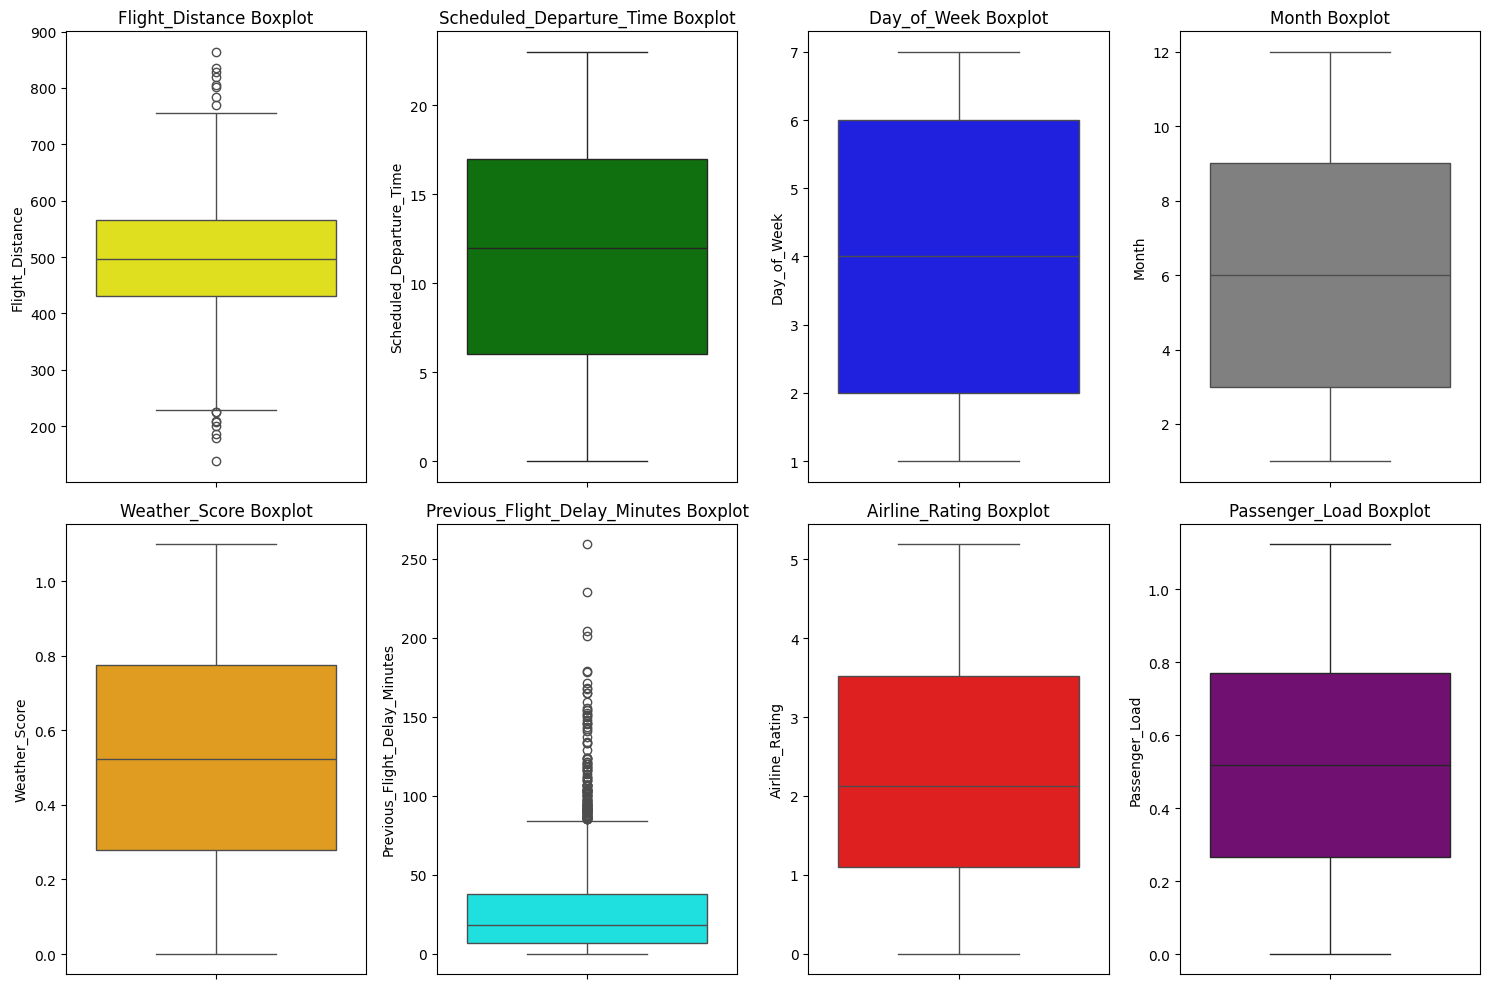

In [255]:
# Boxplots to visualize numeric columns, so that outliers can be identified
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(df["Flight_Distance"], color="yellow")
plt.title("Flight_Distance Boxplot")
plt.subplot(2,4,2)
sns.boxplot(df["Scheduled_Departure_Time"], color="green")
plt.title("Scheduled_Departure_Time Boxplot")
plt.subplot(2,4,3)
sns.boxplot(df["Day_of_Week"], color="blue")
plt.title("Day_of_Week Boxplot")
plt.subplot(2,4,4)
sns.boxplot(df["Month"], color="grey")
plt.title("Month Boxplot")
plt.subplot(2,4,5)
sns.boxplot(df["Weather_Score"], color="orange")
plt.title("Weather_Score Boxplot")
plt.subplot(2,4,6)
sns.boxplot(df["Previous_Flight_Delay_Minutes"], color="cyan")
plt.title("Previous_Flight_Delay_Minutes Boxplot")
plt.subplot(2,4,7)
sns.boxplot(df["Airline_Rating"], color="red")
plt.title("Airline_Rating Boxplot")
plt.subplot(2,4,8)
sns.boxplot(df["Passenger_Load"], color="purple")
plt.title("Passenger_Load Boxplot")
plt.tight_layout()
plt.show()

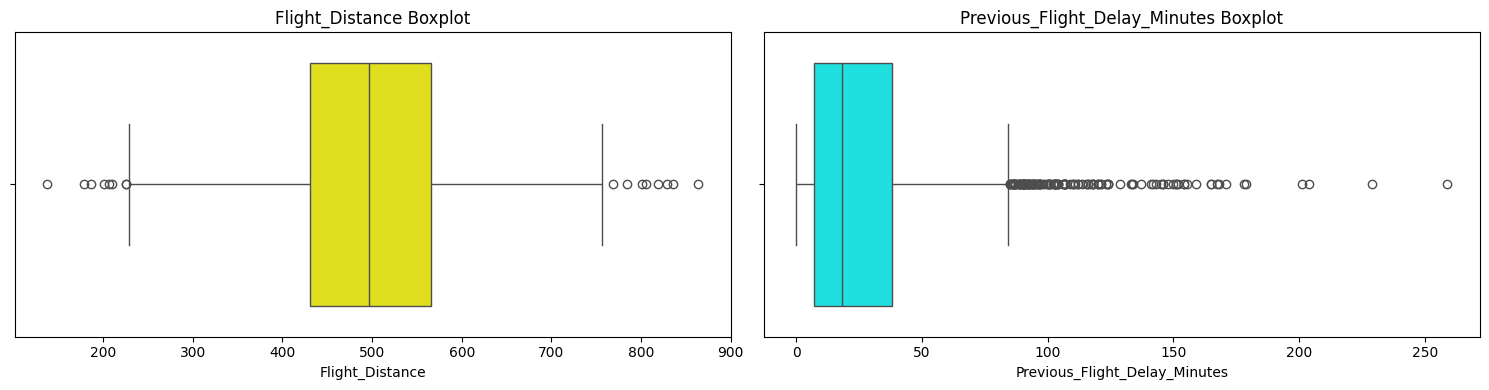

In [256]:
# The boxplots above indicate that only Flight_Distance and Previous_Flight_Delay_Minutes have
# points outside the 25th and 75th quartiles
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x=df["Flight_Distance"], color="yellow")
plt.title("Flight_Distance Boxplot")
plt.subplot(1,2,2)
sns.boxplot(x=df["Previous_Flight_Delay_Minutes"], color="cyan", vert=False)
plt.title("Previous_Flight_Delay_Minutes Boxplot")
plt.tight_layout()
plt.show()

In [257]:
# IQR
Q1 = np.percentile(df["Flight_Distance"], 25)
Q3 = np.percentile(df["Flight_Distance"], 75)
IQR = Q3 - Q1
print("Lower Quartile:", Q1) 
print("Upper Quartile:", Q3) 
print("Interquartile Range:", IQR)

Lower Quartile: 431.0
Upper Quartile: 566.0
Interquartile Range: 135.0


In [258]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("Lower Bound:", lower)
print("Upper Bound:", upper)

Lower Bound: 228.5
Upper Bound: 768.5


In [259]:
df.loc[(df["Flight_Distance"] > upper) | (df["Flight_Distance"] < lower)]
# There are 16 outliers on the "Flight_Distance Column"

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
407,7938893,Airline D,836,Airport 5,Airport 3,8,3,8,Type E,0.708690,79.000000,3.038421,0.006170,1
541,637399,Airline B,806,Airport 2,Airport 5,15,5,12,Type C,0.468256,7.000000,0.304481,0.200962,1
780,2044957,Airline B,819,Airport 5,Airport 2,5,3,3,Type E,0.625160,5.000000,1.909815,0.734765,0
859,2127196,Airline C,201,Airport 2,Airport 2,7,1,2,Type A,0.438356,8.000000,2.742125,0.058302,1
875,199902,Airline A,138,Airport 1,Airport 2,7,6,9,Type A,0.375127,8.888889,2.415624,0.759720,1
1696,1069239,Airline D,226,Airport 1,Airport 3,4,7,10,Type C,0.352645,24.000000,3.202068,0.664270,1
1733,1234109,Airline E,187,Airport 2,Airport 3,0,6,3,Type A,0.170604,11.000000,0.112203,0.571772,1
1756,3516604,Airline C,801,Airport 3,Airport 5,10,7,9,Type E,0.866994,39.000000,3.479601,0.243032,1
2070,7145554,Airline E,179,Airport 2,Airport 5,4,6,6,Type C,0.175268,3.000000,0.674782,0.667868,1
2121,3213783,Airline E,864,Airport 5,Airport 3,15,5,12,Type A,0.701954,100.000000,0.029281,0.241610,1


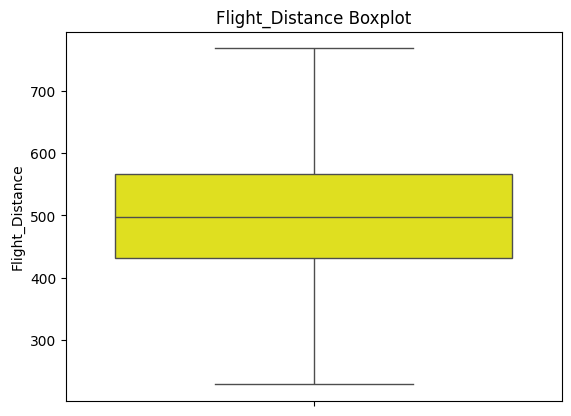

In [260]:
# Handling outliers for the Flight_Distance Column
# The boxplot below displays that outliers have been dealt with
df.loc[(df["Flight_Distance"]>upper), "Flight_Distance"] = upper
df.loc[(df["Flight_Distance"]<lower), "Flight_Distance"] = lower

sns.boxplot(df["Flight_Distance"], color="yellow")
plt.title("Flight_Distance Boxplot")
plt.show()

In [261]:
# IQR
q1 = np.percentile(df["Previous_Flight_Delay_Minutes"], 25)
q3 = np.percentile(df["Previous_Flight_Delay_Minutes"], 75)
iqr = q3 - q1
print("Lower Quartile:", q1) 
print("Upper Quartile:", q3) 
print("Interquartile Range:", iqr)

Lower Quartile: 7.0
Upper Quartile: 38.0
Interquartile Range: 31.0


In [262]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print("Lower Bound:", lower_limit)
print("Upper Bound:", upper_limit) 

Lower Bound: -39.5
Upper Bound: 84.5


In [263]:
df.loc[(df["Previous_Flight_Delay_Minutes"] < lower_limit) | (df["Previous_Flight_Delay_Minutes"] > upper_limit)]
# There are 137 outliers in the Previous_Flight_Delay_Minutes column

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
32,6611154,Airline D,573.0,Airport 2,Airport 2,5,6,11,Type E,0.068507,201.0,4.272926,0.089080,1
53,9501243,Airline E,604.0,Airport 5,Airport 5,17,2,1,Type D,0.408660,123.0,3.357724,0.143825,1
101,6858601,Airline A,514.0,Airport 1,Airport 2,14,5,8,Type A,0.774594,88.0,1.690587,0.762107,1
149,9935988,Airline D,475.0,Airport 4,Airport 2,7,1,3,Type A,0.054268,92.0,4.598887,0.456888,1
194,7644147,Airline D,568.0,Airport 2,Airport 2,8,2,6,Type C,0.140068,229.0,1.614689,0.141256,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,2112710,Airline C,768.5,Airport 5,Airport 5,12,7,4,Type C,0.475553,100.0,2.680703,0.509135,1
2791,5083722,Airline D,441.0,Airport 2,Airport 2,14,3,11,Type E,0.487467,91.0,2.953757,0.150980,1
2796,4398173,Airline A,327.0,Airport 2,Airport 4,22,1,3,Type C,0.900339,94.0,2.147912,0.233785,1
2853,9994076,Airline E,424.0,Airport 4,Airport 3,14,7,1,Type D,0.243482,89.0,0.570088,0.619649,1


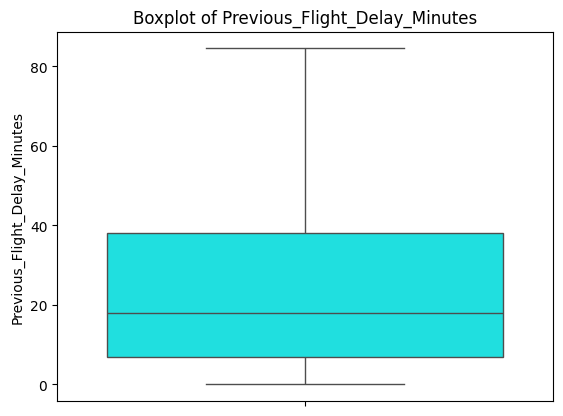

In [264]:
# Handling outliers for the Previous_Flight_Delay_Minutes Column
# The boxplot below displays that outliers have been dealt with
df.loc[df["Previous_Flight_Delay_Minutes"]>upper_limit, "Previous_Flight_Delay_Minutes"]=upper_limit
df.loc[df["Previous_Flight_Delay_Minutes"]<lower_limit, "Previous_Flight_Delay_Minutes"]=lower_limit

sns.boxplot(df["Previous_Flight_Delay_Minutes"], color="cyan")
plt.title("Boxplot of Previous_Flight_Delay_Minutes")
plt.show()